In [2]:
from google.colab import drive
drive.mount('/content/drive')
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import PCA
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


path='/content/drive/My Drive/Colab Notebooks/Stage 2.xlsx'
data1 = pd.read_excel(path,skiprows=1)
#data1.rename(columns={'Absorption with varying flowrate and P=30 BAR':'Time'},inplace=True)
data1.head()
n = len(data1.index) #number of data points in the data set
print('number of data points in the data set:',n)
data = []
columns = ['R2','MSE','R2','MSE']

#Absorption data
print("Finding R2 and MSE for Stage 2 data:")

#X = data1.iloc[:, :-1]  # Independent variables
#y = data1.iloc[:, -1]   # Dependent variable

X = np.array(data1[['% ld','volume (m^3)','HT (W/(m^2*K))','keff (W/(m*K))','Time (s)']])
#.reshape((-1,1))
y = np.array(data1['C (1)'])

# Split your data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = LinearRegression().fit(X_train, y_train)

y_pred = model.predict(X_test)
print("MSE:", mean_squared_error(y_test, y_pred))

r_sq_test = r2_score(y_test, y_pred)
print(f"coefficient of determination: {r_sq_test}")

train_r2 = model.score(X_train, y_train)

print(train_r2)

print("MSE_train:", mean_squared_error(y_train, model.predict(X_train)))

data.append([r_sq_test, mean_squared_error(y_test, y_pred), train_r2, mean_squared_error(y_train, model.predict(X_train))])

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
number of data points in the data set: 554496
Finding R2 and MSE for Stage 2 data:
MSE: 0.006460031112135726
coefficient of determination: 0.8940022256262568
0.8942045542404327
MSE_train: 0.0064395771197681305


In [ ]:
from sklearn.preprocessing import PolynomialFeatures

# Split your data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define the degree of the polynomial (you can change this value)
degree = 2

# Create polynomial features
poly = PolynomialFeatures(degree=degree)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Create and fit the polynomial regression model
model = LinearRegression()
model.fit(X_train_poly, y_train)

# Make predictions
y_pred = model.predict(X_test_poly)

# Calculate R2 and MSE
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f'R2 Score: {r2}')
print(f'Mean Squared Error: {mse}')

train_r2 = model.score(X_train_poly, y_train)

print(train_r2)

print("MSE_train:", mean_squared_error(y_train, model.predict(X_train_poly)))

data.append([r2, mse, train_r2, mean_squared_error(y_train, model.predict(X_train_poly))])

R2 Score: 0.9788731679095074
Mean Squared Error: 0.0012898307194449765
0.9789342434186795
MSE_train: 0.0012909130317453517


In [ ]:
from sklearn.tree import DecisionTreeRegressor

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

# create a regressor object
regressor = DecisionTreeRegressor(random_state = 0)

# Fit models to training data
regressor.fit(X_train, y_train)

# Make predictions on the test data
y_pred_test = regressor.predict(X_test)

# Calculate R2 and MSE for test data
r2_test = r2_score(y_test, y_pred_test)
mse_test = mean_squared_error(y_test, y_pred_test)

print("R-squared (R2) for Output Variable 1 (Test Data):", r2_test)
print("Mean Squared Error (MSE) for Output Variable 1 (Test Data):", mse_test)

train_r2 = regressor.score(X_train, y_train)

print(train_r2)

print("MSE_train:", mean_squared_error(y_train, regressor.predict(X_train)))

data.append([r2_test, mse_test, train_r2, mean_squared_error(y_train, regressor.predict(X_train))])

R-squared (R2) for Output Variable 1 (Test Data): 0.9999577088580653
Mean Squared Error (MSE) for Output Variable 1 (Test Data): 2.5819495224882e-06
1.0
MSE_train: 7.086166938463351e-21


In [ ]:
from sklearn.ensemble import RandomForestRegressor

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

# Create a Random Forest Regressor model
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model to the training data
rf_regressor.fit(X_train, y_train)

# Make predictions on the test data
y_pred = rf_regressor.predict(X_test)

# Calculate R-squared (R2) for both output variables
r2_y = r2_score(y_test, y_pred)

# Calculate Mean Squared Error (MSE) for both output variables
mse_y = mean_squared_error(y_test, y_pred)

# Print the R2 and MSE values for both output variables
print(f"R-squared (R2) for y: {r2_y}")
print(f"Mean Squared Error (MSE) for y: {mse_y}")

train_r2 = rf_regressor.score(X_train, y_train)

print(train_r2)

mse_train = mean_squared_error(y_train, rf_regressor.predict(X_train))

print("MSE_train:", mse_train)

data.append([r2_y, mse_y, train_r2, mse_train])

R-squared (R2) for y: 0.9999823141476418
Mean Squared Error (MSE) for y: 1.0797527794712145e-06
0.9999975379476154
MSE_train: 1.5087497550039384e-07


In [ ]:
from tqdm import tqdm
time = []
des = []
ld = []
vol = []
htc = []
tc = []
#ld_data = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
tc_data = [0.1, 2, 4, 6]
vol_data = [0.001191, 0.001276, 0.001374, 0.001488, 0.001624, 0.001786, 0.001984, 0.002233, 0.002551, 0.002977, 0.003572, 0.004465, 0.005953, 0.00893, 0.01786]
#for k in tqdm(range(18000,21601,60)):
for i in range(9, 10, 1):
  #for j in tc_data:
    #for m in vol_data:
        #for n in range(200, 801, 200):
          p = np.array([i, vol_data[0], 200, 0.1, 7200])
          #array_2d = p.reshape(1, -1)
          #pp = regressor.predict(array_2d)[0]
          p_list = p.tolist()
          mask = (data1['% ld'] == p_list[0]) & \
          (data1['volume (m^3)'] == p_list[1]) & \
          (data1['HT (W/(m^2*K))'] == p_list[2]) & \
          (data1['keff (W/(m*K))'] == p_list[3]) & \
          (data1['Time (s)'] == p_list[4])
          pp = data1.loc[mask, 'C (1)'].iloc[0]
          des.append(pp)
print(max(des), min(des))
print("Maximum at:", data1.loc[data1['C (1)'] == max(des)])
#for a in range(len(time)):
#  if (time[a] == min(time)):
#    print("Time:", time[a])
#    print("C (1):", des[a])
#    print("L/D:", ld[a])
#    print("Volume:", vol[a])
#    print("HTC:", htc[a])
#    print("Keff", tc[a])
#    print("next one")

0.306944046 0.306944046
Maximum at:       Unnamed: 0  % ld  volume (m^3)  HT (W/(m^2*K))  keff (W/(m*K))  \
2056         NaN     9      0.001191             200             0.1   

      Time (s)     C (1)  
2056      7200  0.306944  


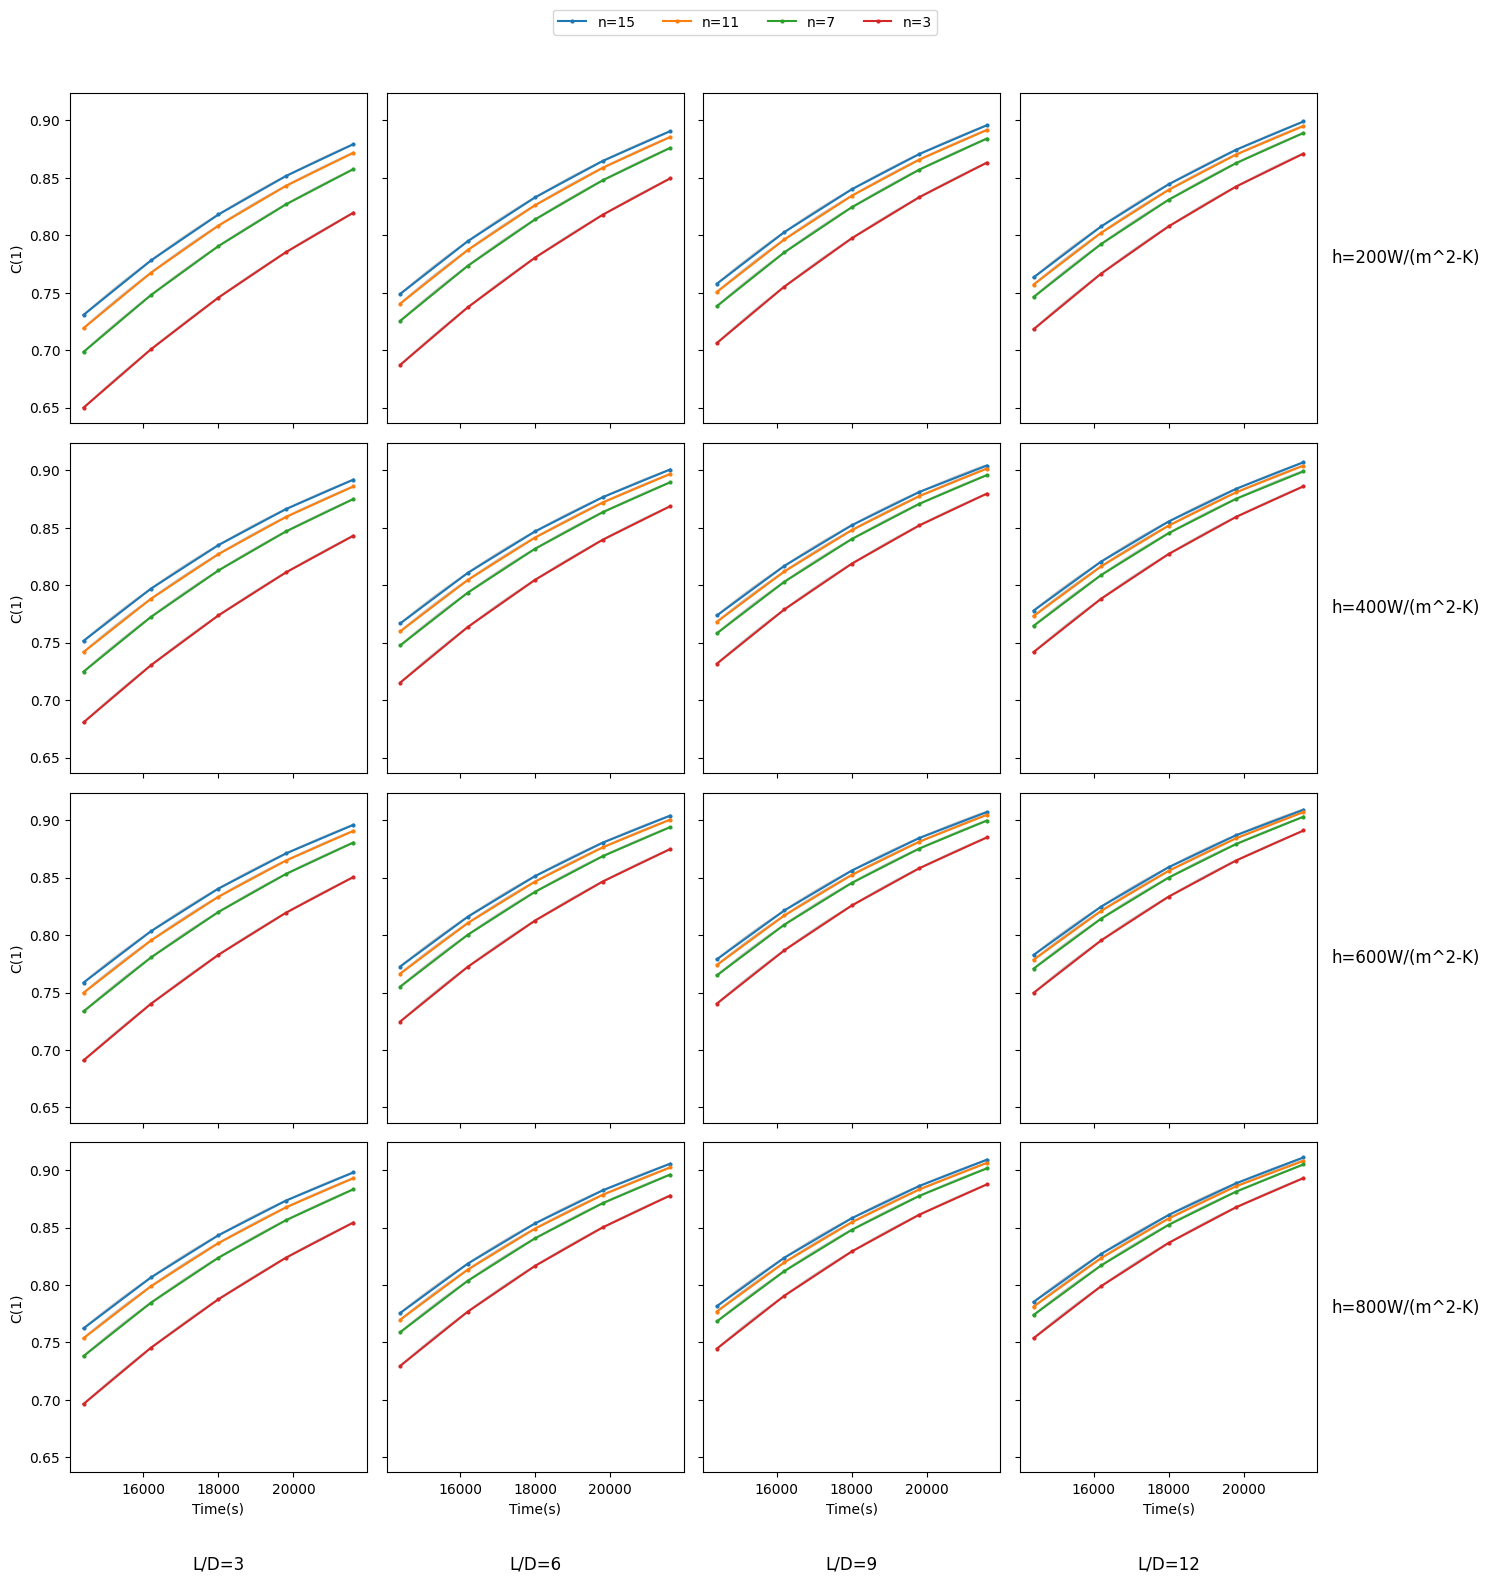

In [ ]:
time = []
des = []
C_1 = {}
tc_data = [0.1, 2, 4, 6]
vol_data = [0.001191, 0.001624, 0.002551, 0.005953]
htc = [x for x in range(200, 801, 200)]
ld_ratio = [y for y in range(3, 13, 3)]

#time = np.linspace(0, 18000, 301)
#print(time)

for n in range(200, 801, 200):
  for i in ld_ratio:
    for m in vol_data:
      for k in range(14400, 21601, 60):
          p = np.array([i, m, n, 6, k])
          p_list = p.tolist()
          mask = (data1['% ld'] == p_list[0]) & \
          (data1['volume (m^3)'] == p_list[1]) & \
          (data1['HT (W/(m^2*K))'] == p_list[2]) & \
          (data1['keff (W/(m*K))'] == p_list[3]) & \
          (data1['Time (s)'] == p_list[4])
          pp = data1.loc[mask, 'C (1)'].iloc[0]
          des.append(pp)
      key = (n, i, m)
      C_1[key] = des
      des = []

time = np.linspace(14400, 21600, 121)

#print(C_1)
#print(time)

# Function to sample 5 equidistant points
def sample_points(time, data, num_points = 5):
    indices = np.linspace(0, len(time) - 1, num_points, dtype=int)
    time1 = []
    data1 = []
    for x in indices:
      time1.append(time[x])
      data1.append(data[x])
    return time1, data1

# Create subplots
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(15, 15), sharex=True, sharey=True)

# Remove space between subplots
plt.subplots_adjust(wspace=0, hspace=0)

# Plot each graph
for a, p1 in enumerate(htc):
    for b, p2 in enumerate(ld_ratio):
        for volume in vol_data:
            ax = axes[a, b]
            key = (p1, p2, volume)
            # Sample 5 equidistant points
            sampled_time, sampled_C1 = sample_points(time, C_1[key])
            # Plot with dots and lines
            ax.plot(time, C_1[key], linestyle='-', color='gray', alpha=0.5)  # Plot the full line in gray
            ax.plot(sampled_time, sampled_C1, marker='.', linestyle='-', markersize=4, label=f'n={round(0.01786/volume)}')
            #ax.set_title(f'h={p1}, ld={p2}')
            # Only label the bottom row and the first column
            if a == 3:
              ax.set_xlabel('Time(s)')
            if b == 0:
              ax.set_ylabel('C(1)')
            ax.legend().set_visible(False)

# Create a single legend
handles, labels = axes[0, 0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, 1.05), ncol=4)

# Add labels for the varying parameters
for a, p1 in enumerate(htc):
    axes[a, -1].annotate(f'h={p1}W/(m^2-K)', xy=(1.05, 0.5), xycoords='axes fraction', ha='left', va='center', fontsize=12)

for b, p2 in enumerate(ld_ratio):
    axes[-1, b].annotate(f'L/D={p2}', xy=(0.5, -0.25), xycoords='axes fraction', ha='center', va='top', fontsize=12)

plt.tight_layout()

# Save the figure
plt.savefig('k = 6.png', dpi=300, bbox_inches='tight')

plt.show()

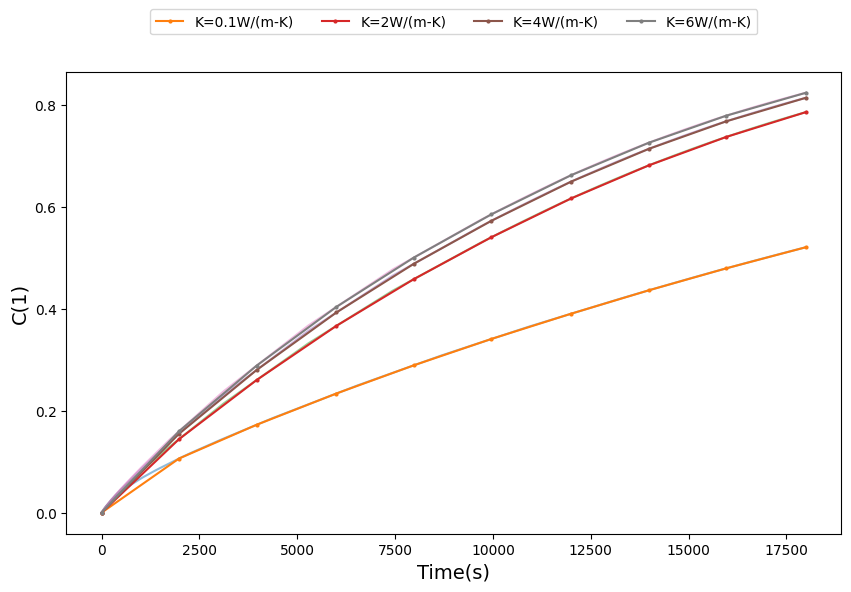

In [6]:
time = []
des = []
C_1 = {}
tc_data = [0.1, 2, 4, 6]
vol_data = [0.001191, 0.001624, 0.002551, 0.005953]
htc = [x for x in range(200, 801, 200)]
ld_ratio = [y for y in range(1, 13, 1)]
for j in tc_data:
#for i in ld_ratio:
  #for m in vol_data:
      for k in range(0,18001,60):
          p = np.array([9, vol_data[2], 200, j, k])
          p_list = p.tolist()
          mask = (data1['% ld'] == p_list[0]) & \
          (data1['volume (m^3)'] == p_list[1]) & \
          (data1['HT (W/(m^2*K))'] == p_list[2]) & \
          (data1['keff (W/(m*K))'] == p_list[3]) & \
          (data1['Time (s)'] == p_list[4])
          pp = data1.loc[mask, 'C (1)'].iloc[0]
          des.append(pp)
      C_1[j] = des
      des = []

time = np.linspace(0, 18000, 301)

#print(C_1)
#print(time)

# Plotting
plt.figure(figsize=(10, 6))

# Function to sample 10 equidistant points
def sample_points(time, data, num_points = 10):
    indices = np.linspace(0, len(time) - 1, num_points, dtype=int)
    time1 = []
    data1 = []
    for x in indices:
      time1.append(time[x])
      data1.append(data[x])
    return time1, data1

for j in tc_data:
            # Sample 5 equidistant points
            sampled_time, sampled_C1 = sample_points(time, C_1[j])
            # Plot with dots and lines
            plt.plot(time, C_1[j], linestyle='-', alpha=0.5)  # Plot the full line in gray
            plt.plot(sampled_time, sampled_C1, marker='.', linestyle='-', markersize=4, label=f'K={j}W/(m-K)')
            #ax.set_title(f'h={p1}, ld={p2}')

plt.xlabel('Time(s)', fontsize = 14)
plt.ylabel('C(1)', fontsize = 14)

#plt.xlim(9000, 18300)
#plt.ylim(0.4, 0.65)

# Create a single legend
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15), ncol=4)

# Save the figure
plt.savefig('Keff variation with n=3, L_D=9, HTC=200.png', dpi=300, bbox_inches='tight')

plt.show()

In [ ]:
from tqdm import tqdm
time = []
des = []
ld = []
vol = []
htc = []
tc = []
#ld_data = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
tc_data = [0.1, 2, 4, 6]
vol_data = [0.001191, 0.001276, 0.001374, 0.001488, 0.001624, 0.001786, 0.001984, 0.002233, 0.002551, 0.002977, 0.003572, 0.004465, 0.005953, 0.00893, 0.01786]
#for k in tqdm(range(14400,18001,60)):
  #for i in range(1, 13, 1):
    #for j in tc_data:
      #for m in vol_data:
        #for n in range(200, 801, 200):
p = np.array([9, vol_data[4], 200, 0.1, 12900])
#array_2d = p.reshape(1, -1)
#pp = regressor.predict(array_2d)[0]
#pp1 = rf_regressor.predict(array_2d)[0]
p_list = p.tolist()

mask = (data1['% ld'] == p_list[0]) & \
       (data1['volume (m^3)'] == p_list[1]) & \
       (data1['HT (W/(m^2*K))'] == p_list[2]) & \
       (data1['keff (W/(m*K))'] == p_list[3]) & \
       (data1['Time (s)'] == p_list[4])

print(data1.loc[mask, :])

       % ld  volume (m^3)  HT (W/(m^2*K))  keff (W/(m*K))  Time (s)     C (1)
57975     9      0.001624             200             0.1     12900  0.449218


In [ ]:
from tqdm import tqdm

data2 = []
new_row = []
tc_data = [0.1, 2, 4, 6]
vol_data = [0.001276, 0.001488, 0.001786, 0.002233, 0.002977, 0.004465, 0.00893]

for i in tqdm(range(1, 13, 1)):
  for m in vol_data:
    for n in range(200, 801, 200):
      for j in tc_data:
        for k in range(0,21601,60):
          p = np.array([i, m, n, j, k])
          array_2d = p.reshape(1, -1)
          pp = regressor.predict(array_2d)[0]
          new_row = np.array([i, m, n, j, k, pp])
          data2.append(new_row)

predicted_data = pd.DataFrame(data2, columns=['% ld','volume (m^3)','HT (W/(m^2*K))','keff (W/(m*K))', 'Time (s)', 'C (1) predicted'])

file_name = 'Even Tubes Decision Tree.xlsx'

predicted_data.to_excel(file_name)

100%|██████████| 12/12 [00:45<00:00,  3.77s/it]


In [ ]:
from tqdm import tqdm
dc_by_dt = 0
t_old = 0
t_new = 60
for c_old in tqdm(y):
  if t_old != 21600 and t_new != 0:
    if t_old != 0:
      mask = data1['C (1)'] == c_old
      c_new = data1['C (1)'].shift(-1)[mask].values[0]
      t_new = data1.loc[data1['C (1)'] == c_new, 'Time (s)'].iloc[0]
      temp = (c_new - c_old) / (t_new - t_old)
      if temp > dc_by_dt:
        dc_by_dt = temp
        c_new_best = c_new
  else:
    t_old = 0
    t_new = 60
  t_old = t_new
print(dc_by_dt)
print("Best Combination is:", data1.loc[data1['C (1)'] == c_new_best])

  0%|          | 355/277248 [00:02<39:24, 117.12it/s]<ipython-input-6-fb48956ff4b8>:11: RuntimeWarning: divide by zero encountered in scalar divide
  temp = (c_new - c_old) / (t_new - t_old)
100%|██████████| 277248/277248 [08:20<00:00, 554.05it/s]

inf
Best Combination is:    % ld  volume (m^3)  HT (W/(m^2*K))  keff (W/(m*K))  Time (s)     C (1)
1     3      0.005953             200             0.1        60  0.006627


In [ ]:
from tqdm import tqdm

# Assuming data1 is your DataFrame and y is the series of your dependent variable 'c'
y = data1['C (1)']

dc_by_dt = 0
c_new_best = None

# Sort the dataframe to ensure proper time series
data1_sorted = data1.sort_values(by=['% ld','volume (m^3)','HT (W/(m^2*K))','keff (W/(m*K))', 'Time (s)'])

# Iterate over the combinations of independent variables
for _, group in tqdm(data1_sorted.groupby(['% ld','volume (m^3)','HT (W/(m^2*K))','keff (W/(m*K))'])):
    group = group.reset_index(drop=True)  # Reset index for easier iteration
    for i in range(1, len(group)):
        t_old = group['Time (s)'].iloc[i - 1]
        t_new = group['Time (s)'].iloc[i]
        c_old = group['C (1)'].iloc[i - 1]
        c_new = group['C (1)'].iloc[i]
        # Exclude initial t = 0 for c_new
        if t_old < 10980 or t_new < 11040:
            continue
        temp = (c_new - c_old) / (t_new - t_old)
        if temp > dc_by_dt:
            dc_by_dt = temp
            c_new_best = c_new
            best_row = group.iloc[i]

print("The maximum value of dc/dt is:", dc_by_dt)
print("Best Combination is:")
print(best_row)

100%|██████████| 768/768 [00:15<00:00, 50.05it/s]

The maximum value of dc/dt is: 3.781138333333415e-05
Best Combination is:
% ld                 12.000000
volume (m^3)          0.005953
HT (W/(m^2*K))      200.000000
keff (W/(m*K))        6.000000
Time (s)          11040.000000
C (1)                 0.605994
Name: 184, dtype: float64


In [ ]:
data1_sorted = data1.sort_values(by=['% ld','volume (m^3)','HT (W/(m^2*K))','keff (W/(m*K))', 'Time (s)'])

data2 = []

# Iterate over the combinations of independent variables
for key, group in tqdm(data1_sorted.groupby(['% ld','volume (m^3)','HT (W/(m^2*K))','keff (W/(m*K))'])):
    group = group.reset_index(drop=True)  # Reset index for easier iteration
    for i in range(1, len(group)):
        t_old = group['Time (s)'].iloc[i - 1]
        t_new = group['Time (s)'].iloc[i]
        c_old = group['C (1)'].iloc[i - 1]
        c_new = group['C (1)'].iloc[i]
        # Exclude initial t = 0 for c_new
        if t_new == 0:
            continue
        dc_dt = (c_new - c_old) / (t_new - t_old)
        row = {**dict(zip(['% ld','volume (m^3)','HT (W/(m^2*K))','keff (W/(m*K))'], key)), 'Time (s)': t_new, 'dc_dt': dc_dt}
        data2.append(row)

# Create an empty DataFrame to store dc/dt values
dc_dt_df = pd.DataFrame(data2, columns=['% ld','volume (m^3)','HT (W/(m^2*K))','keff (W/(m*K))', 'Time (s)', 'dc_dt'])

# Plotting
plt.figure(figsize=(10, 6))

# Iterate over the unique combinations of independent variables to plot them separately
for key, group in dc_dt_df.groupby(['% ld','volume (m^3)','HT (W/(m^2*K))','keff (W/(m*K))']):
    plt.plot(group['Time (s)'], group['dc_dt'], label=f'Combination: {key}')

plt.xlabel('Time (s)')
plt.ylabel('dc/dt')
plt.title('Rate of Change of Reaction Fraction with Respect to Time')
plt.legend()
plt.show()

file_name = 'dc_dt_values.xlsx'

dc_dt_df.to_excel(file_name)

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

# Initialize Gradient Boosting Regressors for both y and y1
gb_regressor_y = GradientBoostingRegressor(n_estimators=100, random_state=42)

# Fit the models with the training data
gb_regressor_y.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = gb_regressor_y.predict(X_test)

# Calculate R2 and MSE for y
r2_y = r2_score(y_test, y_pred)
mse_y = mean_squared_error(y_test, y_pred)

print("R-squared (R2) for y:", r2_y)
print("Mean Squared Error (MSE) for y:", mse_y)

train_r2 = gb_regressor_y.score(X_train, y_train)

print(train_r2)

print("MSE_train:", mean_squared_error(y_train, gb_regressor_y.predict(X_train)))

data.append([r2_y, mse_y, train_r2, mean_squared_error(y_train, gb_regressor_y.predict(X_train))])

R-squared (R2) for y: 0.9980691657721026
Mean Squared Error (MSE) for y: 0.00011788086782867495
0.9980751788576018
MSE_train: 0.00011795335652478405


In [ ]:
from sklearn.svm import SVR

#regressor = SVR(kernel='rbf')
# Split the data into training and testing sets (70% training, 30% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create separate SVR models for each output variable
svr_y = SVR(kernel='linear')  # You can choose the appropriate kernel

# Train the models
svr_y.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = svr_y.predict(X_test)

# Calculate R2 and MSE for the first output variable (y)
r2_y = r2_score(y_test, y_pred)
mse_y = mean_squared_error(y_test, y_pred)

print("R2 for y:", r2_y)
print("MSE for y:", mse_y)

train_r2 = svr_y.score(X_train, y_train)

print(train_r2)

mse_train = mean_squared_error(y_train, svr_y.predict(X_train))

print("MSE_train:", mse_train)

data.append([r2_y, mse_y, train_r2, mse_train])

In [ ]:
values = pd.DataFrame(data, columns = columns)

print(values)

file_name = 'validation_values.xlsx'

values.to_excel(file_name)

         R2       MSE        R2           MSE
0  0.895695  0.006368  0.896125  6.365487e-03
1  0.978873  0.001290  0.978934  1.290913e-03
2  0.999958  0.000003  1.000000  7.086167e-21
3  0.999982  0.000001  0.999998  1.508750e-07
4  0.998069  0.000118  0.998075  1.179534e-04
